In [31]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

In [32]:
pd.options.display.float_format = "{:,.2f}".format
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [33]:
df = pd.read_csv('https://raw.githubusercontent.com/benvictoria17/DataVisualization/master/dataset/COVID-19%20World%20Vaccination%20Progress/country_vaccinations.csv')
manufacturer = pd.read_csv('https://raw.githubusercontent.com/benvictoria17/DataVisualization/master/dataset/COVID-19%20World%20Vaccination%20Progress/country_vaccinations_by_manufacturer.csv')

In [34]:
df = df.drop(['total_vaccinations', 'source_website', 'daily_vaccinations_raw', 'source_name'], axis = 1)

In [35]:
(df.isnull().sum() / df.shape[0]).sort_values(ascending = False)

In [36]:
df.date = pd.to_datetime(df.date)

In [37]:
countries = pd.DataFrame()
for country in df.country.unique():
    countries.loc[country, 'avgDaily'] = df[(df.country == country) & (~df.daily_vaccinations_per_million.isna())].sort_values('date').iloc[-30:].daily_vaccinations_per_million.mean() / 10000
    countries.loc[country, 'percVac'] = df[(df.country == country) & (~df.people_vaccinated_per_hundred.isna())].sort_values('date').iloc[-1].people_vaccinated_per_hundred
    countries.loc[country, 'percFullyVac'] = df[(df.country == country) & (~df.people_fully_vaccinated_per_hundred.isna())].sort_values('date').iloc[-1].people_fully_vaccinated_per_hundred
    countries.loc[country, 'datePercVac'] = df[(df.country == country) & (~df.people_vaccinated_per_hundred.isna())].sort_values('date').iloc[-1].date
    countries.loc[country, 'population'] = 100 * df[(df.country == country) & (~df.people_vaccinated.isna())].sort_values('date').iloc[-1].people_vaccinated / countries.loc[country, 'percVac']

In [38]:
big_countries = countries[countries.population > 500000][['avgDaily', 'percVac', 'percFullyVac', 'population']]

big_countries.sort_values('avgDaily').head(n=10)

,avgDaily,percVac,percFullyVac,population
Burundi,0.00,0.03,0.03,"13,366,666.67"
Democratic Republic of Congo,0.00,0.24,0.11,"90,575,833.33"
Gambia,0.01,9.81,9.25,"2,487,217.13"
Haiti,0.01,1.06,0.62,"11,564,150.94"
Bhutan,0.01,75.62,72.46,"779,902.14"
Niger,0.01,2.02,1.85,"25,110,049.50"
Chad,0.01,1.69,0.48,"16,918,461.54"
Madagascar,0.02,2.07,1.90,"28,454,251.21"
Equatorial Guinea,0.02,17.19,14.03,"1,450,122.16"
Yemen,0.03,1.83,1.20,"30,418,142.08"


In [39]:
big_countries.sort_values('avgDaily', ascending = False).head(n=10)

,avgDaily,percVac,percFullyVac,population
Nicaragua,1.61,69.06,39.98,"6,702,717.93"
Botswana,1.18,47.21,41.95,"2,397,180.68"
Denmark,1.11,82.29,78.03,"5,813,609.19"
Austria,1.08,72.86,70.82,"9,042,506.18"
Vietnam,1.07,78.51,57.44,"98,171,732.26"
Germany,1.05,73.19,70.19,"83,903,714.99"
South Korea,0.97,85.73,82.48,"51,303,965.94"
Greece,0.92,71.46,66.77,"10,370,876.01"
Bangladesh,0.92,52.64,26.90,"166,312,070.67"
Mongolia,0.89,68.05,64.96,"3,329,340.19"


In [40]:
countries['daysTillOneShot'] = (100 - countries.percVac) / countries.avgDaily
countries['daysTillTwoShots'] = (200 - countries.percFullyVac - countries.percVac) / countries.avgDaily
countries['daysTillThreeShots'] = (300 - countries.percFullyVac - countries.percVac) / countries.avgDaily

In [41]:
def ceiling_map(x):
    return min(x, 50000)

temp = countries['daysTillOneShot'].apply(np.ceil).map(ceiling_map).map(lambda x: pd.Timedelta(x, unit='D'))
temp2 = countries['daysTillTwoShots'].apply(np.ceil).map(ceiling_map).map(lambda x: pd.Timedelta(x, unit='D'))
temp3 = countries['daysTillThreeShots'].apply(np.ceil).map(ceiling_map).map(lambda x: pd.Timedelta(x, unit='D'))

days = pd.DataFrame()

days['dateOneShot'] = countries.datePercVac + temp
days['dateTwoShot'] = countries.datePercVac + temp2
days['dateThreeShot'] = countries.datePercVac + temp3

In [42]:
days['yearOneShot'] = days.dateOneShot.dt.year.fillna(2158).astype(int)
days['yearTwoShot'] = days.dateTwoShot.dt.year.fillna(2158).astype(int)
days['yearThreeShot'] = days.dateThreeShot.dt.year.astype(int)
counts = pd.DataFrame()
years = days[['yearOneShot', 'yearTwoShot', 'yearThreeShot']]
for year in range(2021, 2051):
    counts[str(year)] = years[years <= year].count() / years.shape[0]
big_countries = days[countries.population > 500000][['dateOneShot', 'dateTwoShot', 'dateThreeShot']]

In [43]:
big_countries.sort_values('dateTwoShot').head(n=10)

,dateOneShot,dateTwoShot,dateThreeShot
Turkmenistan,2021-10-11,2021-12-20,2022-05-17
China,2021-12-13,2022-01-09,2022-06-11
Portugal,2022-01-09,2022-01-27,2022-07-09
South Korea,2022-01-10,2022-01-28,2022-05-11
Denmark,2022-01-09,2022-01-29,2022-04-29
Chile,2022-01-11,2022-02-06,2022-08-10
Nicaragua,2022-01-04,2022-02-10,2022-04-13
United Arab Emirates,2021-12-29,2022-02-10,2023-05-16
Cuba,2022-01-11,2022-02-12,2022-09-14
Spain,2022-01-16,2022-02-15,2022-07-23


In [44]:
big_countries.sort_values('dateTwoShot', ascending = False).head(n=10)

,dateOneShot,dateTwoShot,dateThreeShot
Burundi,2158-11-15,2158-11-15,2158-11-15
Democratic Republic of Congo,2093-05-08,2158-11-14,2158-11-14
Gambia,2051-10-15,2081-10-22,2114-11-21
Haiti,2050-01-30,2078-04-29,2106-10-01
Niger,2046-03-31,2070-08-16,2095-06-17
Chad,2042-02-18,2062-07-23,2083-01-31
Madagascar,2039-04-08,2056-08-19,2074-05-02
Yemen,2032-05-11,2042-11-13,2053-07-02
Equatorial Guinea,2031-06-30,2041-05-16,2052-11-12
South Sudan,2031-03-24,2040-07-13,2049-12-27


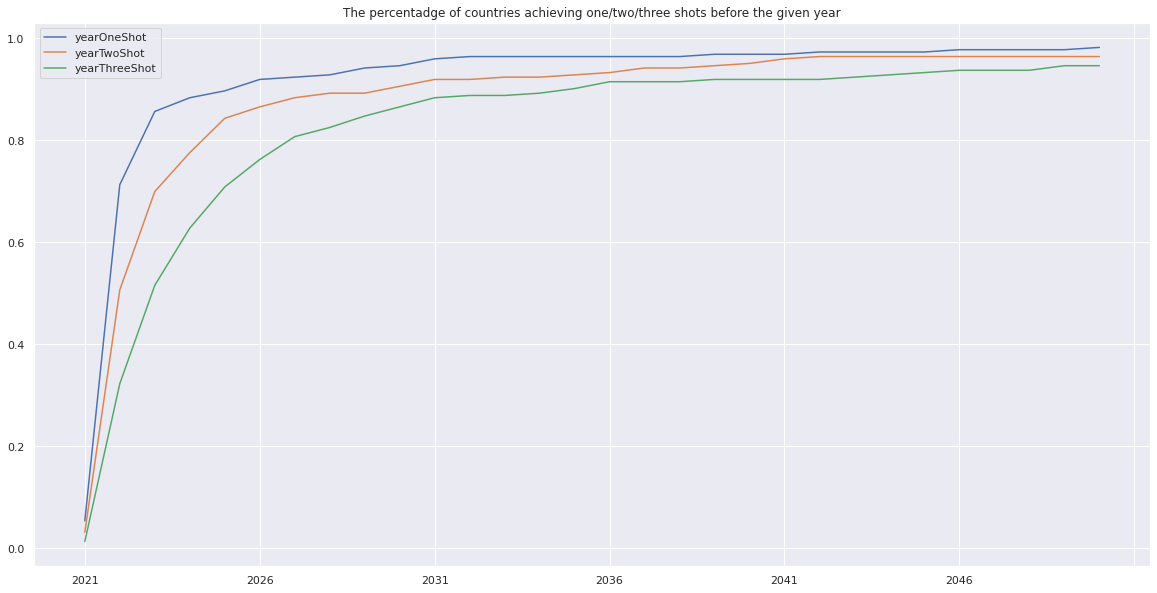

In [45]:
counts.T.plot(figsize=(20,10), title = 'The percentadge of countries achieving one/two/three shots before the given year');